In [1]:
from IPython.display import display, Math, Latex

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# Assignment 2: Cross-Listed Stocks

**Name:** --Tanay Kashyap--

**Student Number:** --20938917--

**Due:** 2021/10/08 at 11:59pm on Dropbox

**What to submit:** both your .ipynb and .pdf files.

Please make sure that each question outputs onto a new page. 
You can do this by inserting a code chunk with the following after each question.
```
%%latex
\newpage
```

## Rules
* You can follow the format of the template notebook to complete this assignment
* Make sure to define any new variables and functions that you are using. If you are doubtful whether you should explain a part of your code, it is better to explain it. 
* Please make sure to conclude your final answers in a statement (if applicable) at the end of each question.

## Objectives
At the end of the assignment, you will:

* Understand how the exchange rates between two countries affects cross-listed stocks
* Be able to extract more data using the `yfinance` API and read in `.csv` files
* Create subplots of data using `matplotlib`


Data
1.	**Yahoo Finance:** This is where the stock data will come from. You can use the Python library, `yfinance`, to extract the data.
2.	**Cross Listed Companies:** We have provided you with a file `inter-listed.csv`. This, in combination with `yfinance`, will provide you with all the information needed for stock exchange data.  **DO NOT** alter this file.
3.	**Bank of Canada Exchange Rates:** We have provided you with a file `exchange_rates.csv` with all the exchange rate data required.  **DO NOT** alter this file.

**Language:** Python 

**Libraries Allowed:** pandas, numpy, matplotlib, datetime, yfinance

**BONUS POINT:** (you will need to attempt the assignment first to understand what is being asked of you here)  We will award a bonus point to those who write completely dynamic code.  To do this, you must start by declaring a string variable containing your ticker.  All of your code must then run and all the questions executed correctly if we change your ticker to another from the 'inter-listed.csv' file. If you are attempting this bonus part, please indicate this in a comment immediately above where declare your ticker string variable.  The comment should read: "BONUS PART: Changeable Ticker"


## Q1
Each of you has a company of their own to analyze.  To find out yours, take the **last two digits** of your student number.  Open the file "Class Tickers.xlsx" and find the index that correponds to the number derived from your student number. At that index you will find the ticker that you will use - the company that this ticker corresponds to will be used throughout the rest of your assignment.   

In this question, you will extract the following data on your company from `yfinance` and store this in a `pandas` DataFrame.
* Company Name (name)
* Domestic Ticker (ticker1)
* Foreign Ticker (ticker2)
* Industry (industry)
* Sector (sector)
* Domestic Stock Exchange (exchange1)
* Foreign Stock Exchange (exchange2)

For each set of information, the column name for the DataFrame is in brackets. 

To obtain the foreign Ticker and foreign stock exchange, you will have to extract this information from `interlisted-companies.csv` and insert this data into your DataFrame. You should write code to extract the foreign Ticker and foreign stock exchange from the csv file (given the domestic ticker). It is important that you complete the assignment, even if you are unable to complete some of the intermediate steps.  Thus, If you are unable to extract the data through code, you should obtain the foreign Ticker and foreign stock exchange by hand and input it into your DataFrame manually (it is better to loose some marks than all marks).

**Restrictions:** Do not create your own external file (e.g., .csv or .txt file) to be read into your DataFrame.  Instead, fill your DataFrame with data obtained from yfinance and the `interlisted-companies.csv` file provided for you. 



HINTS: 

You should begin by printing out the available info for your stock.  You then need to get the information you need into a DataFrame. 

You will need to call up the `interlisted-companies.csv` file.  Write code to search the file for the domestic ticker and save the index where it is found.  Next write code to obtain the correct foreign ticker and foreign stock exchange and store in your Dataframe with the rest of the required information.  The index you found earlier will be helpful in obtaining the correct foreign data.

In [2]:
# Get BNS stock
bns_stock=yf.Ticker('BNS.TO')
bns_foreign=yf.Ticker('BNS')

#read in foreign data
foreign=pd.read_csv('interlisted-companies.csv',index_col='CAD Symbol')

#Code to get the row for the BNS values
US_stock=foreign.loc['BNS.TO']


#Make a dictionary for all information on yFinance
bns_info={'name':bns_stock.info['longName'],
          'ticker1':bns_stock.info['symbol'],
          'ticker2':US_stock['US Symbol'],
          'industry':bns_stock.info['industry'],
          'sector':bns_stock.info['sector'],
          'exchange1':bns_stock.info['exchange'],
          'exchange2':US_stock['International Market']
         }

#create dataframe for the asked info about the stock
bns_df=pd.DataFrame(bns_info,index=[0])

#below is for key search
#bns_stock.info

#get the dates for our stock BNS
hist = bns_stock.history(start='2020-01-01', end='2021-01-01')
hist1=bns_foreign.history(start='2020-01-01',end='2021-01-01')

#output the dataframe
bns_df

,name,ticker1,ticker2,industry,sector,exchange1,exchange2
0,The Bank of Nova Scotia,BNS.TO,BNS,Banks—Diversified,Financial Services,TOR,NASDAQ


In [3]:
%%latex
\newpage


<IPython.core.display.Latex object>

## Q2
Using the `exchange_rates.csv`, write code to extract a subset of data that is strictly for your two respective countries (US Dollar and Canadian Dollar). Store this data in another DataFrame. Display the first five values of this DataFrame.

We will restrict ourselves to data from 2020-01-01 to 2021-01-01, so you need to use code to remove the other dates from your exchange rate DataFrame.   Display the first five values so that you can verify that you have done it correctly.

In [4]:
#read in exchange rates
exchange_rates=pd.read_csv('exchange_rates.csv')
#make the date column the index
exchange_rates.set_index('date', inplace=True)

# make a temp dataframe for usd to cad
temp_currency=pd.DataFrame(exchange_rates['FXUSDCAD'])

#Creating a dataframe that holds currency fluctions for usdcad from 2020-01-01 to 2021-01-01
usdcad=temp_currency[(temp_currency.index>='2020-01-01') & (temp_currency.index<='2021-01-01')]

#output currency pair dataframe
usdcad.head(5)

,FXUSDCAD
date,
2020-01-02,1.2992
2020-01-03,1.2988
2020-01-06,1.2970
2020-01-07,1.3009
2020-01-08,1.3026


In [5]:
%%latex
\newpage

<IPython.core.display.Latex object>

## Q3
### a)
Create a 3x1 subplot using matplotlib that visualizes the exchange rate from the two countries, and the **CLOSING** stock price of your company in both the domestic and foreign market stock market.  All data should be over the same time period as specified in Q2 for the exchange rate.  Make sure that all three graphs have the same x-axis. For the x-axis, display the date every three months (beginning with January 2020) on the x-axis. Please include descriptive titles on your graphs. 

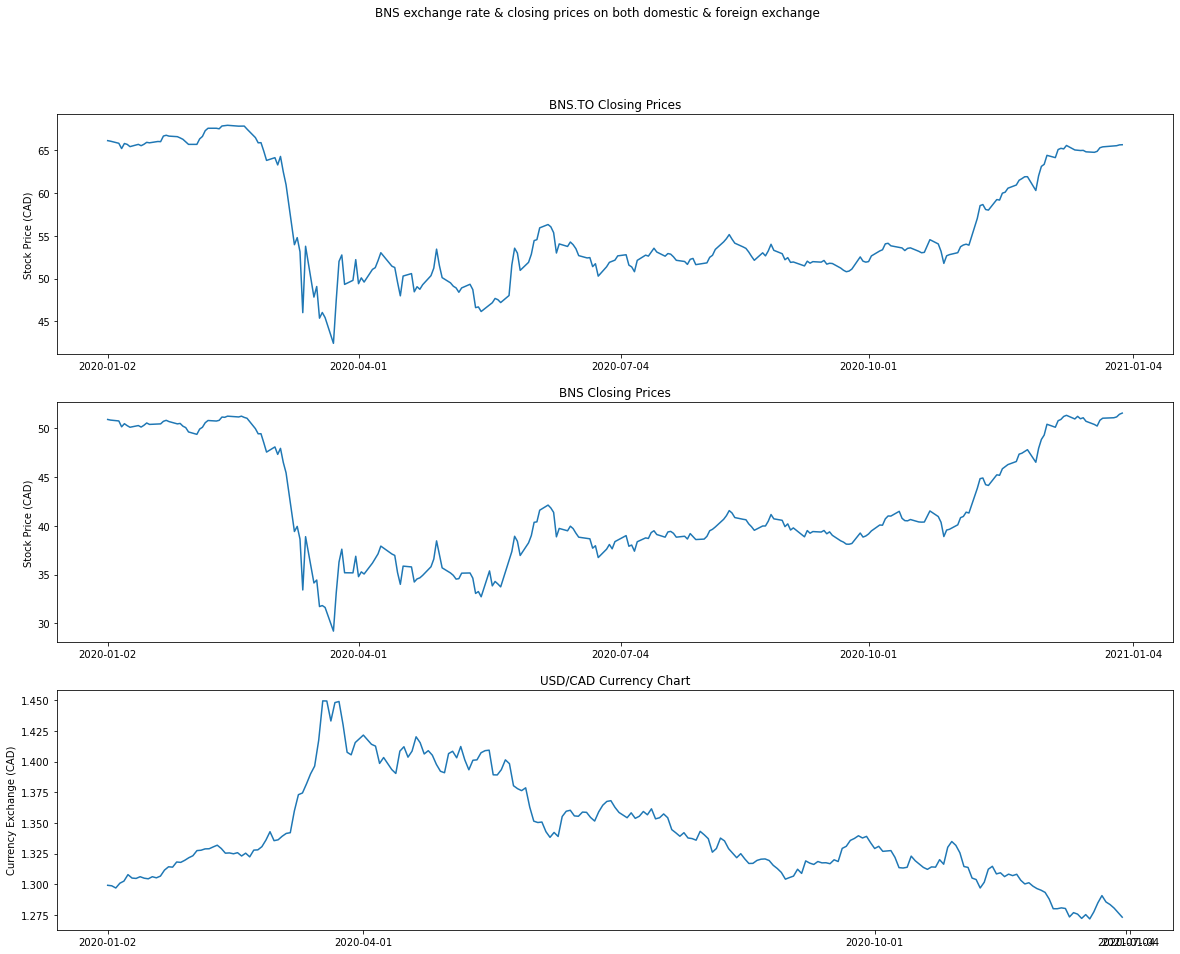

In [6]:
# Specify number of rows and columns (3,1) and define axes for each plot
fig, ((ax1), (ax2), (ax3)) = plt.subplots(3,1)
fig.set_size_inches(20, 15)


# Overall title
fig.suptitle('BNS exchange rate & closing prices on both domestic & foreign exchange')

# Subplot 1 
ax1.title.set_text('BNS.TO Closing Prices')
ax1.plot(hist.index, hist.Close)
ax1.set_xticks(['2020-01-02', '2020-04-01', '2020-07-04', '2020-10-01', '2021-01-04'])

# Subplot 2
ax2.title.set_text('BNS Closing Prices')
ax2.plot(hist1.index, hist1.Close)
ax2.set_xticks(['2020-01-02', '2020-04-01', '2020-07-04', '2020-10-01', '2021-01-04'])

#Subplot 3
ax3.title.set_text('USD/CAD Currency Chart')
ax3.plot(usdcad.index, usdcad.FXUSDCAD)
ax3.set_xticks(['2020-01-02', '2020-04-01', '2020-07-04', '2020-10-01', '2021-01-04'])

ax1.set_ylabel("Stock Price (CAD)")
ax2.set_ylabel("Stock Price (CAD)")
ax3.set_ylabel("Currency Exchange (CAD)")

plt.show()

In [7]:
%%latex
\newpage

<IPython.core.display.Latex object>

### b)
Compare the plots that you created of your closing price for both markets, what do you notice?  Are you able to detect a relationship between the exchange rate graph and the two price plots?  Briefly discuss

# Commentary on the 2 closing prices
As for the closing prices of the domestic market vs. the foreign market, we see that they follow the same patterns of rise/fall & they should as they are the same singular company just sold on 2 different markets. 

# Relationship between exchange and price plots
As the US dollar got stronger with of a increase of almost 0.15 CAD to '2020-04-01' the equity price of the stock fell for both stocks. This is not a for sure correlation that a weakened canadian dollar is synonymous with falling prices but is one of the factors. As CAD devalued, foreign entities with a stronger currency pair to us like the *US* at that speicifc moment will import more and invest more into our country and so exports will increase in turn, increasing the stock price, which we see happeening after 'BNS' almost lost 50% of its value. 

In [8]:
%%latex
\newpage

<IPython.core.display.Latex object>

## Q4


### a)
Convert USD stock prices to CAD stock prices using the appropriate day’s exchange rate. We will call this the *implied closing price.*   For this part, you want to end up with a DataFrame that has the US Close price, The exchange rate, The Canadian Implied close price, and the Canadian actual close price.  Display the first five values of this dataFrame.  Note that this part may take you a number of lines of code to complete.

In [9]:
hist1.reset_index(inplace=True)
usdcad.reset_index(inplace=True)
hist.reset_index(inplace=True)

In [10]:
# Create implied closing price
implied_vs_closing = pd.concat([hist1['Close'],usdcad['FXUSDCAD']], join='inner', axis=1)

#add the other items to the dataframe
implied_vs_closing['CAD Implied Close Price']=implied_vs_closing['Close']*implied_vs_closing['FXUSDCAD']
implied_vs_closing['CAD Actual Close Price']=hist['Close']

implied_vs_closing.set_index(usdcad['date'],inplace=True)

implied_vs_closing.head(5)

,Close,FXUSDCAD,CAD Implied Close Price,CAD Actual Close Price
date,,,,
2020-01-02,50.883995,1.2992,66.108486,66.097542
2020-01-03,50.821201,1.2988,66.006576,66.034729
2020-01-06,50.732193,1.2970,65.799654,65.789459
2020-01-07,50.132782,1.3009,65.217736,65.171700
2020-01-08,50.450653,1.3026,65.717021,65.762199


In [11]:
%%latex
\newpage

<IPython.core.display.Latex object>

### b) 
Write code to calculate the average deviation of the CAD stock price from the implied CAD stock price (actual close minus implied close), and print the result.  In addition, discuss your interpretation of the result.

In [12]:
average_deviation=(implied_vs_closing['CAD Actual Close Price']-implied_vs_closing['CAD Implied Close Price']).mean() #calculates the average deviation of implied vs actual prices
print("The average deviation is $:",average_deviation)

The average deviation is $: 0.10829389010045636


# Interpretation of average deviation
We can see that the average deviation between the actual CAD close price & the implied closing price is around 0.11 CAD. From what I understand is that if we traded the US version of a stock and then converted it to CAD, that our returns would slightly be off if there is a difference in the actual and the conversion. 

In [13]:
%%latex
\newpage

<IPython.core.display.Latex object>

### c) 
Plot the deviations between CAD stock price vs. the implied CAD stock price (actual close minus implied close) over time - this should be done with a scatter plot. Your x-axis should be dates.  Add a horizontal line over the span of your plot at y=0. What is the purpose of this horizontal line?

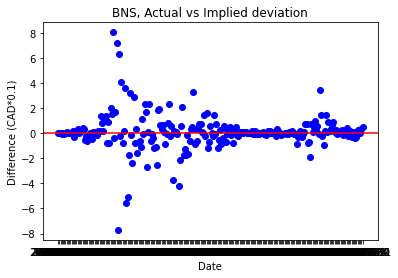

In [14]:
# Plot the data
plt.scatter(implied_vs_closing.index,implied_vs_closing['CAD Actual Close Price']-implied_vs_closing['CAD Implied Close Price']  , color='b')
plt.axhline(y=0, color='r', linestyle = '-')

# Set axis and title
plt.title('BNS, Actual vs Implied deviation')
plt.xlabel('Date')
plt.ylabel('Difference (CAD*0.1)')
plt.show()

# Purpose of Y=0
The purpose of this line is to show how big or small the difference is between the prices of the implied and the actual.

In [15]:
%%latex
\newpage

<IPython.core.display.Latex object>

### d) 
Based on parts (a) – (c), what conclusions can you make about the implied vs. actual closing price?  Overall, what conclusions can you draw about the pricing of your stock in the Canadian versus US market?

# Conclusions
We can see there is a slight deviation of around $0.10 from the implied price to the actual price of the 'BNS.TO' stock. Being this the case, if we were to trade the US version of this stock and convert gains back to CAD, there will be a slight difference be that less CAD or more CAD based on the current exchange rate. Also since theres a deviation between the prices, it shows the CAD stock and the US stock are priced differently and dont follow each other perfectly. 